In [40]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise 10.1.**  Solve
$$
\begin{align}
\text{minimize} \quad & x\\
\text{subject to} \quad & x \geq 0
\end{align}
$$
 using the quadratic pentalty method with $\rho >0$. Solve the problem in closed form.

**Answer:** The problem can be rewritten as

$$
\text{minimize} \quad x + \rho \text{max}(0,x)^2
$$
If the contraint is not active (0 in the max function), then the solution is unbounded, and hence violating the contraint. So the problem is really

$$
\text{minimize} \quad x + \rho x^2
$$

Taking the derivative and setting it to zero gives

$$
1 + 2 \rho x = 0 \quad \Rightarrow \quad x = -\frac{1}{2\rho}
$$

If $\rho \rightarrow \infty$, then $x \rightarrow 0$ as expected.

**Exercise 10.2.**  Solve the problem above using the count penalty method with $\rho >1$ and compare it to the quadratic penalty method.

**Answer:** The problem can be rewritten as

$$
\text{minimize} \quad x + \rho\left(x>0\right)
$$

Both the case when the contraints inactive ($x$) and active ($x+\rho$) are unbounded, so this method does not work while the quadratic penalty method did.

**Exercise 10.3.**  Suppose that you are solving a constrained problem with the penalty method. You notice that the iterates remain infeasible and you decide to stop the algorithm. What can you do to be more successful in your next attempt?

**Answer:** Increase the penalty parameter. This will make the penalty term more important in the objective function, and hence the algorithm will try to minimize the penalty term more.

**Exercise 10.4.**  Consider a simple univariate minimization problem where you minimize a function $f(x)$ subject to the constraint $x \geq 0$. Assume that you know that the constraint is active, that is, $x^* = 0$ where $x^*$ is is the minimizer and $f'(x^*)>0$ from the optimality conditions. Show that solving the same problem with the penalty method

$$
f(x) + \left(\text{max}(0,x)\right)^2
$$
yields an infeasible solution with respect to the original problem.

**Answer:** The problem can be rewritten as

**Exercise 10.5.**  What is the advantage of the augmented Lagrange method compared to the quadratic penalty method?

**Answer:** The augmented Lagrange method doesnt require the penalty parameter to be increased to infinity to get the correct solution.

**Exercise 10.6.**  When would you use the barrier method in place of the penalty method?

**Answer:** When iterations must be feasible at all times.

** Exercise 10.7.**  Give an example of a smooth optimization problem, such that, for any penalty parameter $\rho > 0$, there exists a starting point $x^{(1)}$ for which the steepest descent method diverges.

**Answer:** We need a function that is unbounded below and also grows larger that the quadtic penalty term. For example, $f(x) = x^3$.

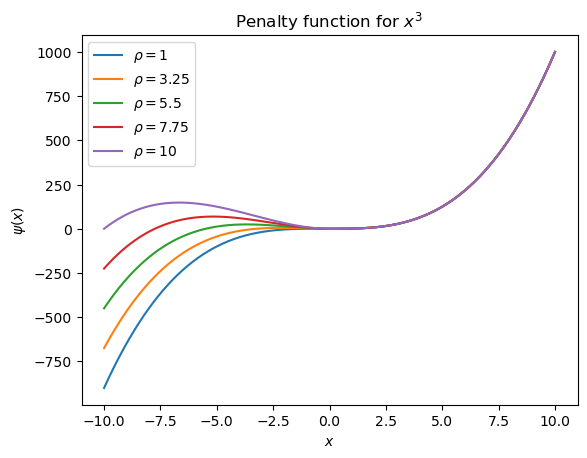

In [41]:
def f(x):
    return x**3

def g(x):
    return (np.minimum(0,x))**2

x = np.linspace(-10,10,1000)
rho = np.linspace(1,10,5)

for i in rho:
    plt.plot(x,f(x)+i*g(x),label=r'$\rho = %g$' %i)
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x)$')
plt.title(r'Penalty function for $x^3$')
plt.show()

**Exercise 10.8.**  Suppose you have an optimization problem

$$
\begin{align}
\text{minimize} \quad & f(x)\\
\text{subject to} \quad & h(x) = 0\\
& g(x) \leq 0
\end{align}
$$
but do not have an initial feasible design. How would you find a feasible point with respect to the constraints, provided that one exists?

**Answer:** For this problem we are not interested in $f(x)$, so we can just solve the contraints. We can do this by solving the following problem

$$
\begin{align}
\text{minimize} \quad & \sum_{i=1}^m \left(h_i(x)\right)^2 + \sum_{j=1}^n \left(\text{max}(0,g_j(x))\right)^2
\end{align}
$$

since we have the quadratic penalty term, the problem is convex and we can solve it using a first or second order method.

**Exercise 10.9.**  Solve the constrained optimization problem

$$
\begin{align}
\text{minimize} \quad & \sin\left(\frac{4}{x}\right)\\
\text{subject to} \quad & x\in [1,10]
\end{align}
$$

using both the transform $x = t_{a,b}(\hat{x})$ and a sigmoid transform for constraint bounds $x \in [a,b]$:

$$
x = s(\hat{x}) = a + \frac{b-a}{1+e^{-\hat{x}}}
$$

Why is the $t$ transform better than the sigmoid transform?

**Answer:** We can plot the transformations to see why the $t$ transform is better.

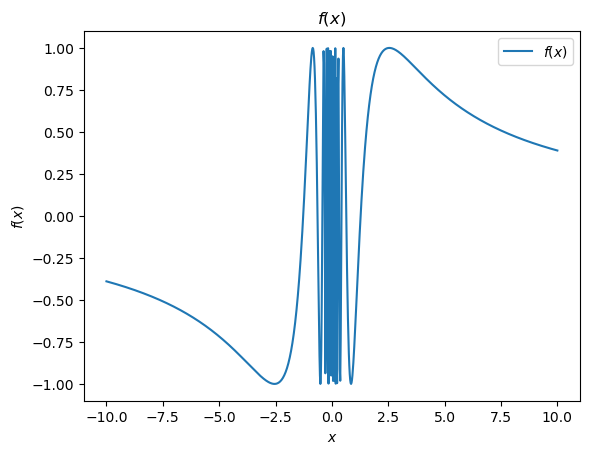

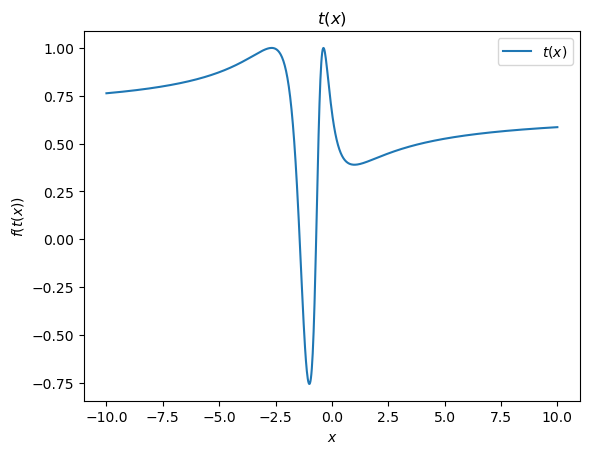

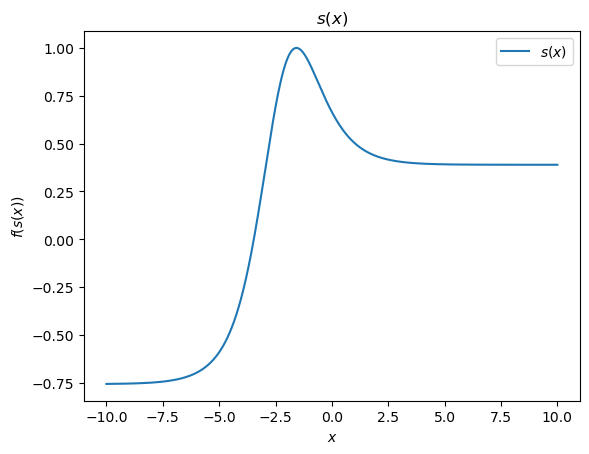

In [42]:
lb = 1
ub = 10

def t_transform(x,a,b):
    return (b+a)/(2)+(b-a)/(2)*((2*x)/(1+x**2))

def sigmoid_transform(x,a,b):
    return a + (b-a)/(1+np.exp(-x))

def function(x):
    return np.sin(4/x)

x = np.linspace(-10,10,1000)

plt.plot(x,function(x),label=r'$f(x)$')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'$f(x)$')
plt.show()

plt.plot(x,function(t_transform(x,lb,ub)),label=r'$t(x)$')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$f(t(x))$')
plt.title(r'$t(x)$')
plt.show()

plt.plot(x,function(sigmoid_transform(x,lb,ub)),label=r'$s(x)$')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$f(s(x))$')
plt.title(r'$s(x)$')
plt.show()

As we can see, the sigmoid transform does not have a solution for the minimization problem, while the $t$ transform does.

**Exercise 10.10.**  Give an example of a quadratic objective function involving two design variables where the addition of a linear constraint results in a different optimum.

**Answer:** Consider the problem

$$
\begin{align}
\text{minimize} \quad & x_1^2 + x_2^2\\
\text{subject to} \quad & x_1 + x_2 = 1
\end{align}
$$

The solution to the unconstrained problem is $x_1 = x_2 = 0$, while the solution to the constrained problem is

$$
\mathcal{L}(x_1,x_2,\lambda) = x_1^2 + x_2^2 + \lambda(x_1 + x_2 - 1)
$$

Taking the derivative and setting it to zero gives

$$
\begin{align}
2x_1 + \lambda &= 0\\
2x_2 + \lambda &= 0\\
x_1 + x_2 &= 1
\end{align}
$$

which has the solution $x_1 = x_2 = \frac{1}{2}$ and $\lambda = -1$.


**Exercise 10.11.**  Suppose we want to minimize $x^3_1+x^2_2+x_3$ subject to the constraint $x_1+2x_2+3x_3=6$. How might we transform this into an unconstrained problem with the same minimizer?

**Answer:** Since we can isloate $x_3$ in the constraint, we can rewrite the problem as

$$
\begin{align}
\text{minimize} \quad & x_1^3 + x_2^2 + \left(6 - x_1 - 2x_2\right)\\
\end{align}
$$

(the function seems to be unbounded below).

**Exercise 10.12.**  Suppose we want to minimize $-x_1-2x_2$ subject to the constraint $\alpha x_1^2+x_2^2 \leq 1$ and $x_1,x_2 \geq 0$. If $\alpha$ is a bounded constant, what range of values of $\alpha$ will result in an infinite number of optimal solutions?

**Answer:** The problem can be rewritten as

$$
\begin{align}
\text{minimize} \quad & -x_1 - 2x_2\\
\text{subject to} \quad & \alpha x_1^2 + x_2^2-1 \leq 0\\
& -x_1 \leq 0\\
& -x_2 \leq 0
\end{align}
$$

The Lagrangian is

$$
\mathcal{L}(x_1,x_2,\mu_1,\mu_2,\mu_3) = -x_1 - 2x_2 + \mu_1\left(\alpha x_1^2 + x_2^2 - 1\right) - \mu_2 x_1 - \mu_3 x_2
$$

The conditions are (except feasibility)

$$
\begin{align}
-1 + 2\alpha\mu_1 x_1 - \mu_2 &= 0\\
-2 + 2\mu_1 x_2 - \mu_3 &= 0\\
\alpha x_1^2 + x_2^2 - 1 &= 0\\
\mu_1\left(\alpha x_1^2 + x_2^2 - 1\right) &= 0\\
\mu_2x_1 &= 0\\
\mu_3x_2 &= 0\\
\mu_1 &\geq 0\\
\mu_2 &\geq 0\\
\mu_3 &\geq 0\\
x_1 &\geq 0\\
x_2 &\geq 0
\end{align}
$$